# Mineração de dados de cotação do café



## Introdução

O café é uma das commodities mais consumidas em todo o mundo, e os preços do café são influenciados por uma série de fatores, incluindo condições climáticas, oferta e demanda global, câmbio e muito mais. Prever os preços do café é um desafio significativo devido à natureza complexa e volátil desse mercado. Neste trabalho é explorado como as redes neurais podem ser usadas para prever os preços do café, com um foco especial em utilizar a biblioteca TensorFlow em Python.

## Base de Dados Escolhida

Para realizar esta análise, foi selecionado um conjunto de dados de preços globais do café. Os dados incluem informações sobre os preços mensais do café ao longo de várias décadas desde 1988. Inicialmente, são carregados os dados de um arquivo CSV usando a biblioteca Pandas e são apresentados em uma série temporal.

### Global Coffee Prices
[Global Coffee Prices](https://tradingeconomics.com/commodity/coffee)

In [7]:
# Importar as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [8]:
# Carregar os dados a partir do arquivo CSV
file_path = "/content/PCOFFOTMUSDM.csv"
df = pd.read_csv(file_path, parse_dates=["DATE"])

In [9]:
# Selecionar a coluna de preços
data = df["PCOFFOTMUSDM"].values
data = data.reshape(-1, 1)

In [10]:
# Normalizar os dados entre 0 e 1
data_min = np.min(data)
data_max = np.max(data)
data = (data - data_min) / (data_max - data_min)

In [11]:
# Dividir os dados em treinamento e teste
train_size = int(len(data) * 0.67)
train_data, test_data = data[0:train_size, :], data[train_size:len(data), :]

In [17]:
# Função para criar sequências de dados com base no histórico
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

In [13]:
# Definir o comprimento das sequências
seq_length = 12

# Criar sequências de treinamento
X_train, y_train = create_sequences(train_data, seq_length)

# Criar sequências de teste
X_test, y_test = create_sequences(test_data, seq_length)

In [14]:
# Construir o modelo de rede neural
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")

## Pré-Processamento dos Dados

Antes de alimentar os dados em uma rede neural, foram realizadas algumas etapas importantes de pré-processamento. Primeiro, foram normalizados os preços do café para garantir que estejam na mesma escala. Isso foi feito usando o MinMaxScaler do Scikit-Learn. Em seguida, foram divididos os dados em conjuntos de treinamento e teste. A parte inicial dos dados é usada para treinar o modelo, enquanto a parte final é reservada para testar as previsões.
Modelagem da Rede Neural

Foi utilizado uma rede neural recorrente (RNN) com uma camada LSTM (Long Short-Term Memory) para modelar a série temporal dos preços do café. A rede é implementada usando o TensorFlow e a biblioteca Keras, que fornece uma interface amigável para construir modelos de aprendizado profundo.

A arquitetura da rede neural consiste em uma camada LSTM com 50 unidades, seguida por uma camada densa que gera a previsão final. O otimizador "adam" é usado para minimizar a função de perda "mean_squared_error". O modelo foi treinado por 100 épocas com um tamanho de lote de 32.

In [15]:
# Treinar o modelo
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Realizar previsões
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverter a escala das previsões para obter valores reais
train_predict = train_predict * (data_max - data_min) + data_min
test_predict = test_predict * (data_max - data_min) + data_min

Epoch 1/100
9/9 [==============================] - 3s 10ms/step - loss: 0.0327
Epoch 2/100
9/9 [==============================] - 0s 9ms/step - loss: 0.0123
Epoch 3/100
9/9 [==============================] - 0s 9ms/step - loss: 0.0102
Epoch 4/100
9/9 [==============================] - 0s 9ms/step - loss: 0.0097
Epoch 5/100
9/9 [==============================] - 0s 10ms/step - loss: 0.0085
Epoch 6/100
9/9 [==============================] - 0s 9ms/step - loss: 0.0081
Epoch 7/100
9/9 [==============================] - 0s 9ms/step - loss: 0.0080
Epoch 8/100
9/9 [==============================] - 0s 10ms/step - loss: 0.0075
Epoch 9/100
9/9 [==============================] - 0s 9ms/step - loss: 0.0077
Epoch 10/100
9/9 [==============================] - 0s 10ms/step - loss: 0.0070
Epoch 11/100
9/9 [==============================] - 0s 9ms/step - loss: 0.0069
Epoch 12/100
9/9 [==============================] - 0s 9ms/step - loss: 0.0065
Epoch 13/100
9/9 [==============================] - 0s 9m

## Treinamento e Avaliação

Após treinar o modelo com os dados de treinamento, foi avaliado o desempenho usando os dados de teste. Para isso, foram feitas previsões em ambos os conjuntos de treinamento e teste e foi calculado o erro médio quadrado (MSE) das previsões. O MSE é uma medida de quão bem o modelo está se saindo na tarefa de previsão.

## Previsões Futuras

Uma das partes mais interessantes desse projeto é a capacidade do modelo treinado de fazer previsões para o futuro. Usamos os dados mais recentes para prever os preços do café para os próximos 20 anos, gerando uma série temporal de previsões.

## Resultados e Visualização

Finalmente, visualizamos os resultados das previsões e os comparamos com os dados reais. O gráfico resultante mostra as previsões de treinamento e teste, bem como as previsões futuras em relação aos dados reais de preços do café.

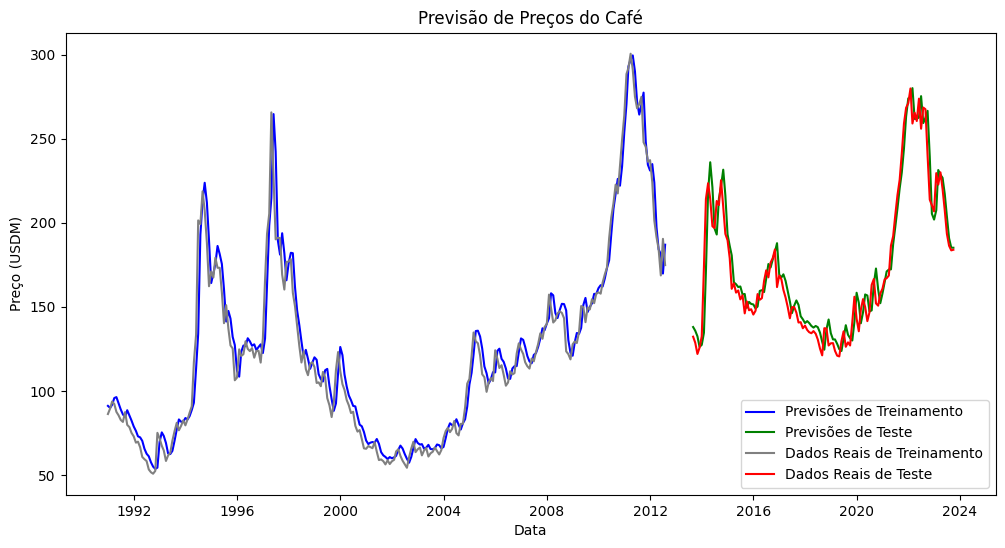

In [16]:
# Plotar os resultados
plt.figure(figsize=(12, 6))
plt.plot(df["DATE"].values[seq_length:train_size], train_predict, label="Previsões de Treinamento", color="blue")
plt.plot(df["DATE"].values[train_size + seq_length:], test_predict, label="Previsões de Teste", color="green")
plt.plot(df["DATE"].values[seq_length:train_size], df["PCOFFOTMUSDM"].values[seq_length:train_size], label="Dados Reais de Treinamento", color="gray")
plt.plot(df["DATE"].values[train_size + seq_length:], df["PCOFFOTMUSDM"].values[train_size + seq_length:], label="Dados Reais de Teste", color="red")
plt.title("Previsão de Preços do Café")
plt.xlabel("Data")
plt.ylabel("Preço (USDM)")
plt.legend()
plt.show()


### Kaggle
[Kaggle](https://www.kaggle.com/datasets/psycon/daily-coffee-price/data)

------------------------------
------------------------------
Acurácia:  0.6275021758050479
Recall:  0.4805081033727551
Precision:  0.6759088108441158
f1 Score:  0.5616999487967229
------------------------------
------------------------------
--- Matriz de Confusão ---
     pred_neg  pred_pos
neg      1787       526
pos      1186      1097


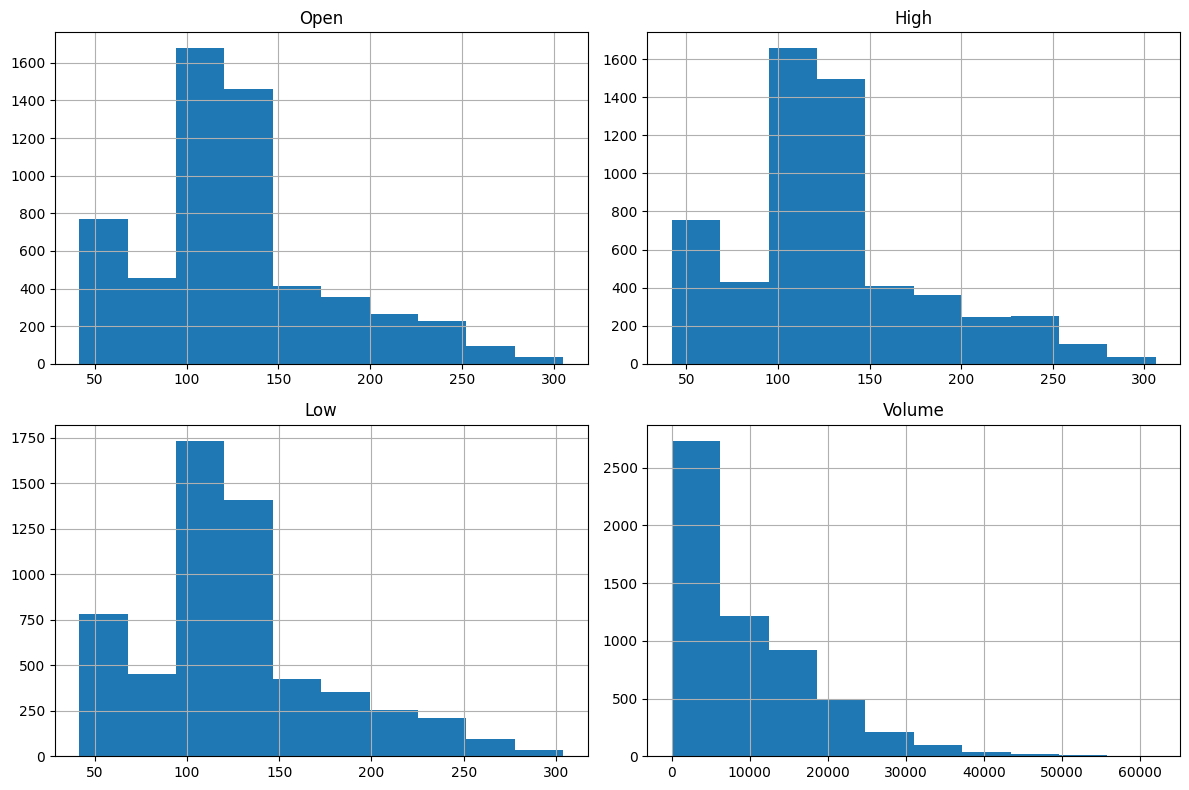

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

# Carregar os dados
file_path = '/content/coffee.csv'
data = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

# Apresenta, de forma completa, as cinco primeiras instâncias da base de dados.
data.head()

# Escolher o atributo para prever (por exemplo, 'Close')
target_attribute = 'Close'

# Escolher atributos para entrada
features = ['Open', 'High', 'Low', 'Volume']

# Filtrar os dados
filtered_data = data[[target_attribute] + features]

# Adicionar um rótulo para indicar se o preço aumentou no próximo dia
filtered_data['PriceIncreased'] = filtered_data[target_attribute].shift(-1) > filtered_data[target_attribute]

# Remover a última linha (não há rótulo para ela)
filtered_data = filtered_data.dropna()

# Separar os dados em conjuntos de treinamento e teste
train_size = int(len(filtered_data) * 0.8)
train_data, test_data = filtered_data[:train_size], filtered_data[train_size:]

# Separar as features e os rótulos
X_train, y_train = train_data[features], train_data['PriceIncreased']
X_test, y_test = test_data[features], test_data['PriceIncreased']

# Criar uma instância do modelo K-NN
knnModel = KNeighborsClassifier(n_neighbors=10, metric='euclidean')

# Ajustar o modelo com os dados de treino
knnModel.fit(X_train, y_train)

# Fazer previsões para os dados de treino
predictions_train = knnModel.predict(X_train)

# Avaliar o desempenho no conjunto de treino
accuracy_train = accuracy_score(y_train, predictions_train)
recall_train = recall_score(y_train, predictions_train)
precision_train = precision_score(y_train, predictions_train)
f1_train = f1_score(y_train, predictions_train)

# Imprimir métricas
print('------------------------------')
print('------------------------------')
print('Acurácia: ', accuracy_train)
print('Recall: ', recall_train)
print('Precision: ', precision_train)
print('f1 Score: ', f1_train)
print('------------------------------')
print('------------------------------')
print('--- Matriz de Confusão ---')
print(pd.DataFrame(confusion_matrix(y_train, predictions_train), index=['neg', 'pos'], columns=['pred_neg', 'pred_pos']))


# Visualizar o histograma para as colunas selecionadas
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

for i, feature in enumerate(features):
    row = i // 2
    col = i % 2
    data[feature].hist(ax=axes[row, col])
    axes[row, col].set_title(feature)

plt.tight_layout()
plt.show()

<ipython-input-21-7795b7a7c22d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


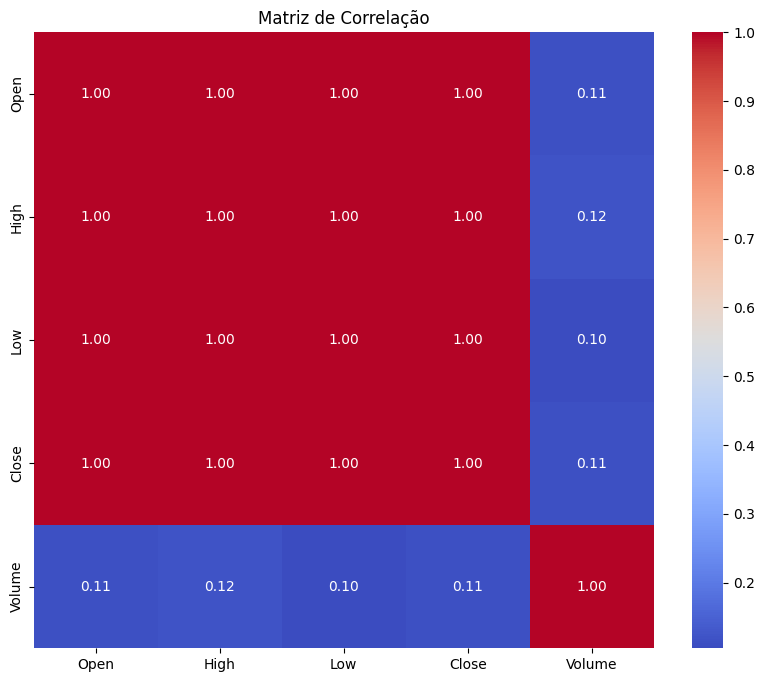

In [21]:
# Calcular a matriz de correlação
correlation_matrix = data.corr()

# Visualizar as correlações usando um mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

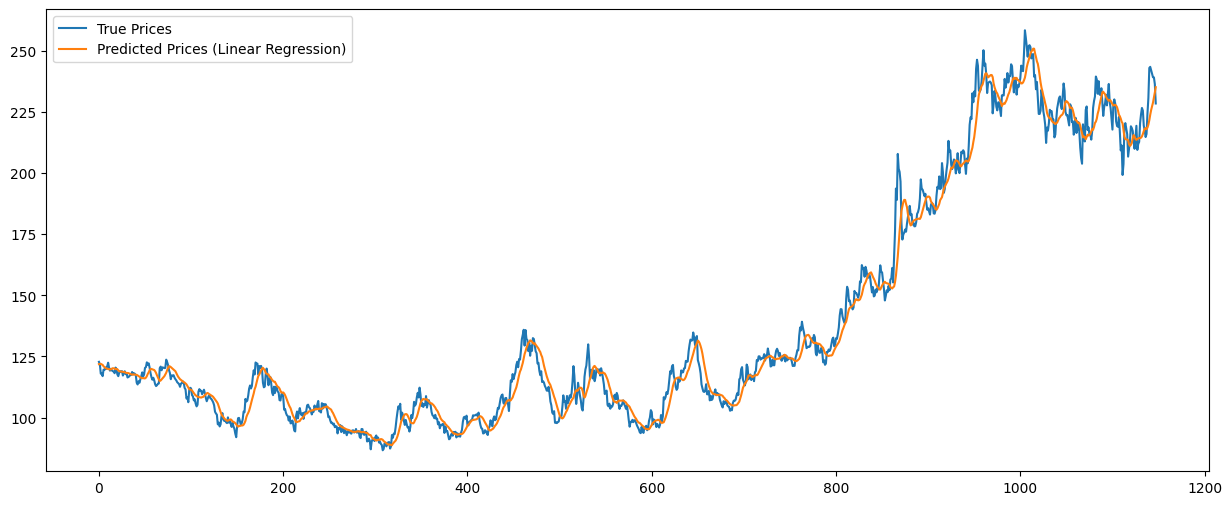

Coeficiente (inclinação): 0.9966814546006173
Interceptação: 0.0010685027574617312


In [22]:
# Usar apenas a coluna Close para este exemplo
data = data[['Close']]

# Normalizar os dados
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Escolher o comprimento da sequência temporal
sequence_length = 10

# Criar sequências e rótulos
X, y = create_sequences(data_scaled, sequence_length)

# Apenas para simplificar, utilizaremos a média das sequências como entrada
X_mean = np.mean(X, axis=1)

# Redimensionar X_mean para torná-lo bidimensional
X_mean = X_mean.reshape(-1, 1)

# Redimensionar y para ser bidimensional
y = y.reshape(-1, 1)

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_mean, y, test_size=0.2, shuffle=False)

# Construir o modelo de regressão linear
model = LinearRegression()

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões
predictions = model.predict(X_test)

# Desnormalizar as previsões e os rótulos
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

# Plotar os resultados
plt.figure(figsize=(15, 6))
plt.plot(y_test, label='True Prices')
plt.plot(predictions, label='Predicted Prices (Linear Regression)')
plt.legend()
plt.show()

# Coeficientes da regressão linear
print("Coeficiente (inclinação):", model.coef_[0][0])
print("Interceptação:", model.intercept_[0])

## Considerações Finais

A capacidade de fazer previsões precisas sobre os preços das commodities como o café pode ser valiosa para produtores, comerciantes e investidores. No entanto, é importante observar que as previsões são baseadas em dados históricos e não levam em consideração eventos imprevisíveis que podem afetar os preços, como condições climáticas extremas ou crises econômicas.

Em resumo, este trabalho ilustra como a combinação de ciência de dados, aprendizado de máquina e bibliotecas como TensorFlow pode ser aplicada para abordar problemas complexos, como a previsão de preços de commodities, e fornece uma visão fascinante sobre o mundo do café.